# Lista Prática 2 - Analise de Séries Temporais

Humberto Seghetto dos Santos - 1810232

Pedro Thiago Marmello - 1612702

In [ ]:
## Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import statsmodels.api as sm
import numpy as np
from IPython.display import clear_output

In [ ]:
## Funções
def root_mean_square_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    r = y_true - y_pred
    return np.mean(r**2)**(1/2)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

## 1.I - Serie temporal

A serie temporal aqui utilizada será a serie de desemprego nos Estados Unidos (EUA), disponivel em https://www.kaggle.com/datasets/axeltorbenson/unemployment-data-19482021, a mesma serie utilizada na lista 1 pelo Pedro.

Como a serie é muito instavel, devido as varias crises e choques economicos, e tambem muito grande, possuindo mais de 70 anos de dados, escolhemos trabalhar especificamente com um periodo de 10 anos entre jan/2010 até dez/2019. Esse periodo foi escolhido por ser de um tamanho satisfatório e ser relativamente estável sem grandes choques economicos externos, situando-se suficientemente distante da crise de 2008 e antes dos efeitos da pandemia de COVID-19.

In [ ]:
## Importando a série
df_original = pd.read_csv("unemployment_rate_data.csv",index_col="date")
df_original.index = pd.to_datetime(df_original.index)
df_original = df_original.sort_index()
df = df_original[-143:-35]
df_teste = df_original[-35:-35+12]
df

,unrate,unrate_men,unrate_women,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over
date,,,,,,,,,,
2010-01-01,10.6,12.3,8.5,26.8,26.9,17.1,11.0,9.4,8.5,7.5
2010-02-01,10.4,12.2,8.5,27.4,25.0,16.6,10.8,9.5,8.4,7.6
2010-03-01,10.2,11.8,8.3,29.2,23.6,15.8,10.9,9.1,8.4,7.2
2010-04-01,9.5,10.6,8.2,27.3,22.3,16.4,10.0,7.9,7.7,6.7
2010-05-01,9.3,10.1,8.5,30.2,25.0,15.2,10.3,7.4,7.2,6.6
...,...,...,...,...,...,...,...,...,...,...
2018-08-01,3.9,3.7,4.3,12.4,12.3,6.5,4.3,2.9,2.7,3.2
2018-09-01,3.6,3.5,3.6,11.4,12.9,6.9,3.3,2.8,2.5,2.8
2018-10-01,3.5,3.5,3.6,9.3,13.0,6.6,3.6,2.8,2.5,2.6


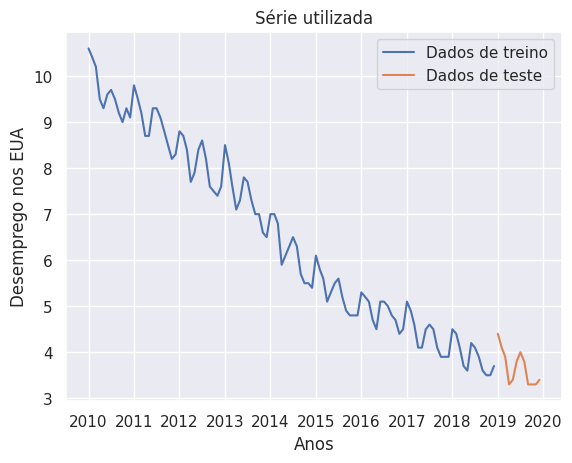

In [ ]:
sns.set_theme()
plt.plot(df.unrate,label = "Dados de treino")
plt.plot(df_teste.unrate,label="Dados de teste")
plt.legend()
plt.title("Série utilizada")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

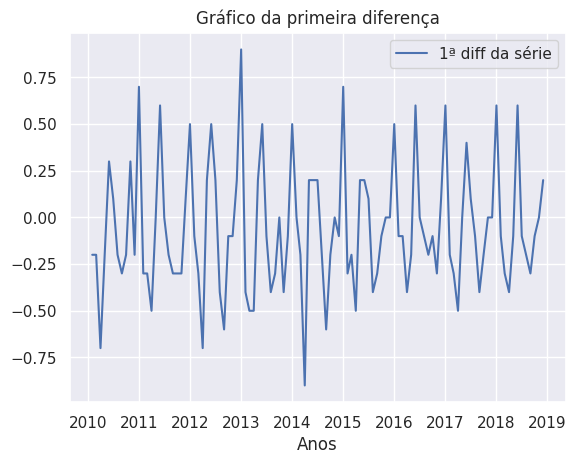

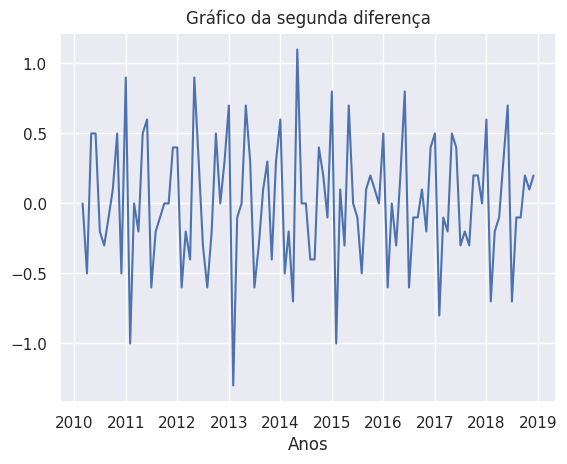

In [ ]:
## Gráficos
diff_1a = df.diff()
diff_1a.dropna(inplace=True)
plt.plot(diff_1a.unrate,label = "1ª diff da série")
plt.legend()
plt.title("Gráfico da primeira diferença")
plt.xlabel("Anos")
plt.ylabel("")
plt.show

plt.figure()
diff_2a = diff_1a.diff()
diff_2a.dropna(inplace=True)
plt.plot(diff_2a.unrate,label = "2ª diff da série")
plt.title("Gráfico da segunda diferença")
plt.xlabel("Anos")
plt.ylabel("")
plt.show

A partir dos gráficos acima podemos determinar que se trata de uma serie de tendencia (aproximadamente) linear, na qual devemos usar d=1. Concluimos isso a partir do formato do gráfico da serie original e do gráfico para a serie da diferença primeira, principalmente já que o segundo se mostra razoavelmente estacionário.

## 1.II

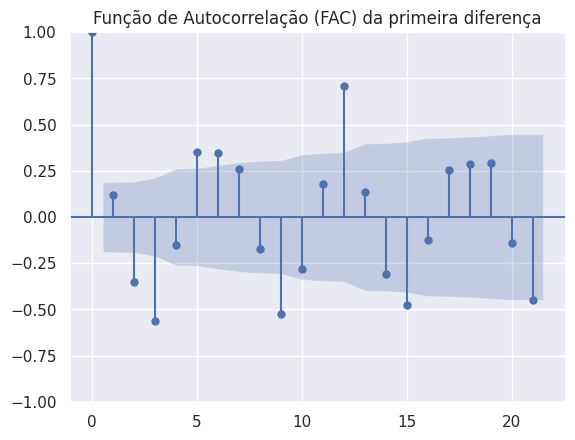

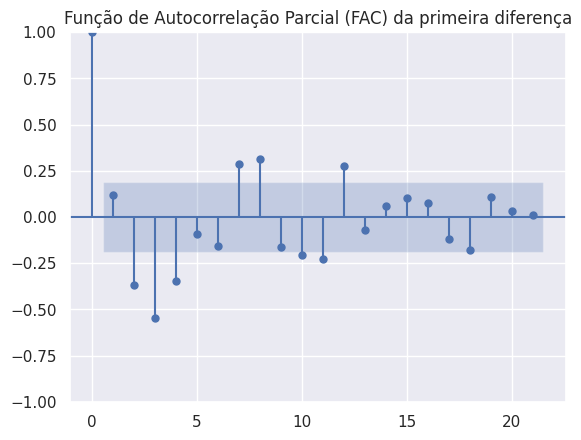

In [ ]:
z = diff_1a.unrate

### Gráficos de autocorrelação da diff 1ª
sm.graphics.tsa.plot_acf(z)
plt.title("Função de Autocorrelação (FAC) da primeira diferença")
sm.graphics.tsa.plot_pacf(z)
plt.title("Função de Autocorrelação Parcial (FAC) da primeira diferença")
print("")

### 1.II.a

Ainda não conseguimos determinar (p,q) sem outros testes. Apenas a julgar
pelo gráfico, em ambos os casos apresentam um comportamento aproximadamente senoidal, e portanto não é possivel deternar (p,q) com segurança.

### 1.II.b


Sim, existe dependência Sazonal. Isso é possível observar a partir da FAC em que os pontos possuem grande autocorrelação a cada 12 meses.

## 1.III

In [ ]:
best_aic = np.inf
best_order = None

In [ ]:
aic_df = pd.DataFrame(columns=['p', 'q', 'AIC'])
# Loop para estimar modelos ARMA com diferentes valores de p e q
for p in range(6):
    for q in range(6):
        try:
            # Cria o modelo ARMA(p, q)
            model = sm.tsa.ARIMA(z, order=(p, 0, q))

            # Ajusta o modelo aos dados
            results = model.fit()

            # Calcula o AIC (Critério de Informação de Akaike) para avaliar o modelo
            aic = results.aic
            aic_df.loc[len(aic_df)] = [p, q, aic]
            # Se o AIC for melhor do que o melhor até agora, atualiza os melhores valores
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)

        except:
            continue

clear_output()
print(f"Melhor modelo: ARMA {best_order} - AIC: {best_aic}")

Melhor modelo: ARMA (5, 4) - AIC: -29.866171302906814


In [ ]:
### Tabela com correalção ARMA(p,q) e AIC
aic_df

,p,q,AIC
0,0.0,0.0,76.057122
1,0.0,1.0,75.027141
2,0.0,2.0,49.690280
3,0.0,3.0,39.240264
4,0.0,4.0,36.720137
5,0.0,5.0,21.213279
6,1.0,0.0,76.557310
7,1.0,1.0,76.429886
8,1.0,2.0,49.292613
9,1.0,3.0,41.159352


O melhor modelo encontrado foi o ARMA(5,4), já que obteve o menor AIC.


## 1.IV

In [ ]:
model = sm.tsa.ARIMA(z, order=(5, 0, 4))
# Ajusta o modelo aos dados
results = model.fit()
resids = results.resid
clear_output()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 unrate   No. Observations:                  107
Model:                 ARIMA(5, 0, 4)   Log Likelihood                  25.933
Date:                Sun, 08 Oct 2023   AIC                            -29.866
Time:                        19:34:03   BIC                             -0.465
Sample:                    02-01-2010   HQIC                           -17.947
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0603      0.012     -5.178      0.000      -0.083      -0.037
ar.L1          0.2570      0.114      2.262      0.024       0.034       0.480
ar.L2         -1.2271      0.111    -11.029      0.000      -1.445      -1.009
ar.L3         -0.4238      0.211     -2.005      0.045      -0.838      -0.010
ar.L4         -0.3053      0.109     -2.801      0.005      -0.519      -0.092
ar.L5         -0.6561      0.107     -6.103      0.000      -0.867      -0.445
ma.L1         -0.7803      0.087     -8.976      0.000      -0.951      -0.610
ma.L2          1.5584      0.109     14.313      0.000       1.345       1.772
ma.L3         -0.7509      0.106     -7.093      0.000      -0.958      -0.543
ma.L4          0.8015      0.101      7.940      0.000       0.604       0.999
sigma2         0.0334      0.005      6.671      0.000       0.024       0.043
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 7.39
Prob(Q):                              0.85   Prob(JB):                         0.02
Heteroskedasticity (H):               0.58   Skew:                             0.43
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 1200x400 with 0 Axes>

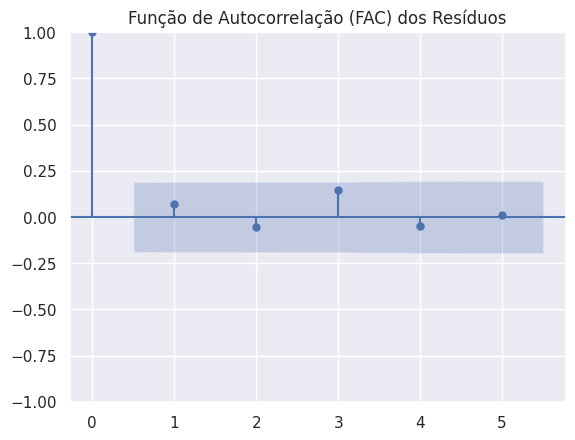

In [ ]:
# Calcule a FAC e plote
plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_acf(resids, lags=5, alpha=0.05)
plt.title("Função de Autocorrelação (FAC) dos Resíduos")
plt.show()

<Figure size 1200x400 with 0 Axes>

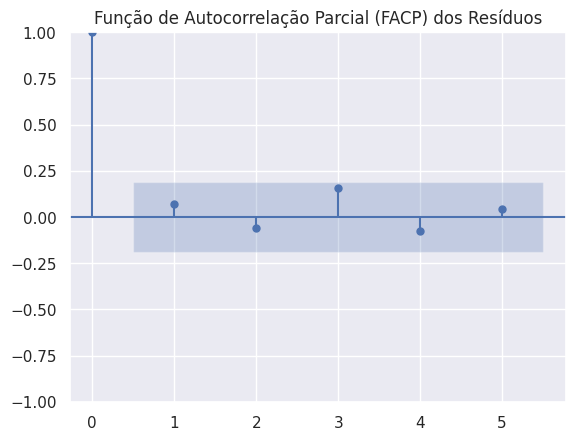

In [ ]:
# Calcule a FACP e plote
plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_pacf(resids, lags=5, alpha=0.05)
plt.title("Função de Autocorrelação Parcial (FACP) dos Resíduos")
plt.show()

Verificamos nos gráficos acima que não existem tendências não capturadas que sejam de magnitude relevante.

## 1.V

Escolheremos o modelo ARIMA(5,1,4), uma vez que determinamos que d=1 e (p,q) = (5,4) nos itens anteriores. Como os resultados da FAC e FACP em 1.IV se mostraram satisfatórios, não iremos propor mudanças adicionais.

O modelo ARMA(p,q) pode ser descrito como:

\begin{align*}
Y_t &= C + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \ldots + \phi_p Y_{t-p} + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \ldots - \theta_q \epsilon_{t-q} \\
\end{align*}

Por sua vez, o modelo mais geral ARIMA(p,d,q) assume a forma:

\begin{align*}
(1 - \phi_1 L - \phi_2 L^2 - \ldots - \phi_p L^p) (1 - L)^d Y_t &=  C + (1 + \theta_1 L + \theta_2 L^2 + \ldots + \theta_q L^q) \epsilon_t \\
\end{align*}

Logo, como escolhemos p=5, d=1 e q=4 obtemos o modelo ARIMA:
\begin{align*}
(1 - \phi_1 L - \phi_2 L^2 - \phi_3 L^3 - \phi_4 L^4 - \phi_5 L^5) (1 - L) Y_t &= C +  (1 + \theta_1 L + \theta_2 L^2 + \theta_3 L^3 + \theta_4 L^4) \epsilon_t \\
\end{align*}


## 1.VI

Escrevendo a equação para ARMA(5,4) temos:
\begin{align*}
Y_t &= C +  \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} + \phi_4 Y_{t-4} + \phi_5 Y_{t-5} + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3} - \theta_4 \epsilon_{t-4} \\
\end{align*}

## 1.VII

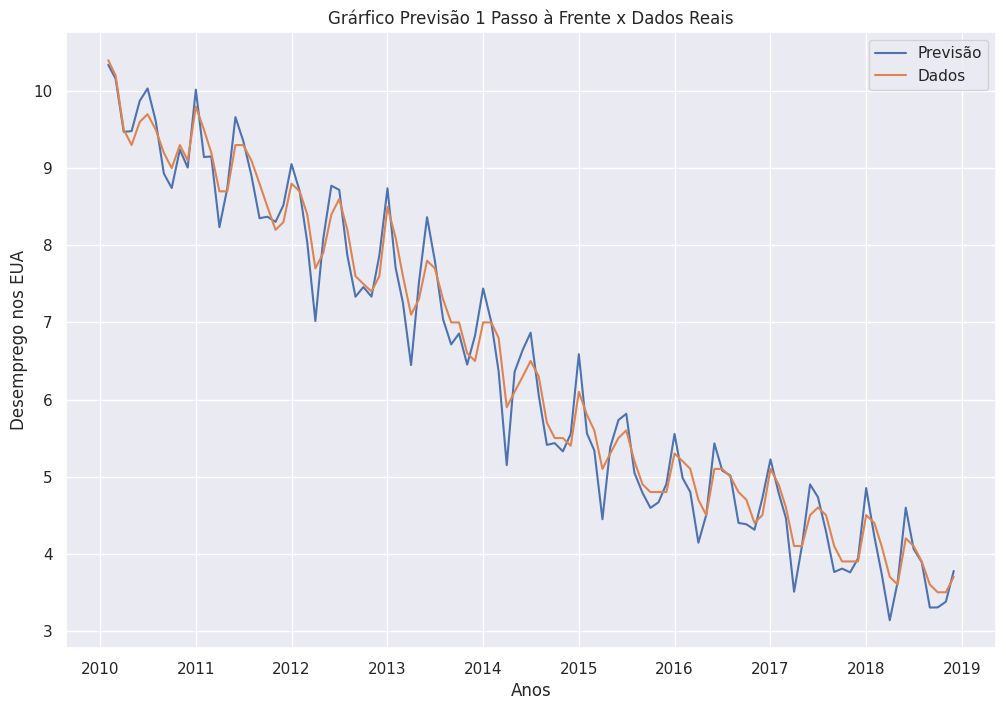

In [ ]:
serie = df.unrate[1:]
prev1 = results.fittedvalues + serie
plt.figure(figsize=(12,8))
plt.plot(df.index[1:],prev1, label = "Previsão")
plt.plot(df.index[1:],serie, label = "Dados")

plt.legend()
plt.title("Grárfico Previsão 1 Passo à Frente x Dados Reais")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

In [ ]:
rmse = root_mean_square_error(serie,prev1)
mae = mean_absolute_error(serie,prev1)
mape = mean_absolute_percentage_error(serie,prev1)

print(rmse,mae,mape)

0.2876166635842436 0.2339871873362643 3.9380005936042495


Obtivemos bons resultados para as previsões 1 passo a frente, com apenas 3.94% de erro de acordo com a MAPE. Observando o gráfico é possivel notar que os maiores erros ocorrem sazonamente nos periodos de baixa da primeira metade do ano. Como o modelo não possui parametros sazonais, é razoavel que esta seja uma dificuldade maior do modelo.

## 2 - Previsões

## 2.I

Substituindo os valores númericos obtidos para o modelo ARMA, temos a seguinte formula para Zt

\begin{align*} Z_t = -0.0603 + \epsilon_t -0.7803 \cdot \epsilon_{t-1} + 1.5584 \cdot \epsilon_{t-2} -0.7509 \cdot \epsilon_{t-3} + 0.8015 \cdot \epsilon_{t-4} + 0.2570 \cdot Z_{t-1} - 1.2271 \cdot Z_{t-2} - 0.4238 \cdot Z_{t-3} - 0.3053 \cdot Z_{t-4} - 0.6561 \cdot Z_{t-5} \end{align*}

Fazendo a previsão para 'k' passos, k=1,2,3:
Para $k = 1$:
\begin{equation}
Z_{t+1} = -0.0603 + \varepsilon_{t+1} + (-0.7803) \cdot \varepsilon_{t} + 1.5584 \cdot \varepsilon_{t-1} + (-0.7509) \cdot \varepsilon_{t-2} + 0.8015 \cdot \varepsilon_{t-3} - 0.2570 \cdot Z_{t} - (-1.2271) \cdot Z_{t-1} - (-0.4238) \cdot Z_{t-2} - (-0.3053) \cdot Z_{t-3} - (-0.6561) \cdot Z_{t-4}
\end{equation}

Para $k = 2$:
\begin{equation}
Z_{t+2} = -0.0603 + \varepsilon_{t+2} + (-0.7803) \cdot \varepsilon_{t+1} + 1.5584 \cdot \varepsilon_{t} + (-0.7509) \cdot \varepsilon_{t-1} + 0.8015 \cdot \varepsilon_{t-2} - 0.2570 \cdot Z_{t+1} - (-1.2271) \cdot Z_{t} - (-0.4238) \cdot Z_{t-1} - (-0.3053) \cdot Z_{t-2} - (-0.6561) \cdot Z_{t-3}
\end{equation}

Para $k = 3$:
\begin{equation}
Z_{t+3} = -0.0603 + \varepsilon_{t+3} + (-0.7803) \cdot \varepsilon_{t+2} + 1.5584 \cdot \varepsilon_{t+1} + (-0.7509) \cdot \varepsilon_{t} + 0.8015 \cdot \varepsilon_{t-1} - 0.2570 \cdot Z_{t+2} - (-1.2271) \cdot Z_{t+1} - (-0.4238) \cdot Z_{t} - (-0.3053) \cdot Z_{t-1} - (-0.6561) \cdot Z_{t-2}
\end{equation}

## 2.II

\begin{align*} Z_t = -0.0603 + \epsilon_t -0.7803 \cdot \epsilon_{t-1} + 1.5584 \cdot \epsilon_{t-2} -0.7509 \cdot \epsilon_{t-3} + 0.8015 \cdot \epsilon_{t-4} + 0.2570 \cdot Z_{t-1} - 1.2271 \cdot Z_{t-2} - 0.4238 \cdot Z_{t-3} - 0.3053 \cdot Z_{t-4} - 0.6561 \cdot Z_{t-5} \end{align*}


A forma geral da expressão de previsão para um horizonte de previsão $k$ no modelo ARMA $(5, 4)$ seria:

\begin{equation}
Z_{t+k} = -0.0603 + \varepsilon_{t+k} + (-0.7803) \cdot \varepsilon_{t+k-1} + 1.5584 \cdot \varepsilon_{t+k-2} + (-0.7509) \cdot \varepsilon_{t+k-3} + 0.8015 \cdot \varepsilon_{t+k-4} + 0.2570 \cdot Z_{t+k-1} + (-1.2271) \cdot Z_{t+k-2} + (-0.4238) \cdot Z_{t+k-3} + (-0.3053) \cdot Z_{t+k-4} + (-0.6561) \cdot Z_{t+k-5}
\end{equation}

Para obter Yt a partir de Zt basta lembrar que Zt é a serie da primeira diferença de Yt, logo usamosa seguinte propriedade:

\begin{align*} Z_t = (1 - L) Y_t = Y_t - Y_{t-1} \end{align*}

Logo, podemos obter Yt como:

\begin{align*} Y_t = Y_{t-1} -0.0603 + \epsilon_t -0.7803 \cdot \epsilon_{t-1} + 1.5584 \cdot \epsilon_{t-2} -0.7509 \cdot \epsilon_{t-3} + 0.8015 \cdot \epsilon_{t-4} + 0.2570 \cdot (1-L)^1 Y_{t-1} - 1.2271 \cdot (1-L)^2 Y_{t-2} - 0.4238 \cdot (1-L)^3 Y_{t-3} - 0.3053 \cdot (1-L)^4 Y_{t-4} - 0.6561 \cdot (1-L)^5 Y_{t-5} \end{align*}

Que pode ser generalizado como:

\begin{equation}
Y_{t+k} = Y_{t+k-1} -0.0603 + \varepsilon_{t+k} + (-0.7803) \cdot \varepsilon_{t+k-1} + 1.5584 \cdot \varepsilon_{t+k-2} + (-0.7509) \cdot \varepsilon_{t+k-3} + 0.8015 \cdot \varepsilon_{t+k-4} + 0.2570 \cdot (1-L)^1 Y_{t+k-1} + (-1.2271) \cdot (1-L)^2 Y_{t+k-2} + (-0.4238) \cdot (1-L)^3 Y_{t+k-3} + (-0.3053) \cdot (1-L)^4 Y_{t+k-4} + (-0.6561) \cdot (1-L)^5 Y_{t+k-5}
\end{equation}

## 2.III

In [ ]:
model = sm.tsa.ARIMA(z, order=(5, 0, 4))

fit = model.fit()

pred = fit.get_prediction(start = "2010-02-01", end= "2018-12-01")

pred_summary = pred.summary_frame(alpha=0.05)

def sum_to_df(series, df):
        return df + series

pred_summary = pred_summary.apply(lambda x: sum_to_df(df.unrate, x), axis=0)
clear_output()

In [ ]:
pred_summary.dropna(inplace=True)
pred_summary

unrate,mean,mean_se,mean_ci_lower,mean_ci_upper
2010-02-01,10.339740,10.704126,9.743664,10.935816
2010-03-01,10.161218,10.500512,9.572225,10.750211
2010-04-01,9.471523,9.799898,8.883735,10.059312
2010-05-01,9.481140,9.533304,9.023872,9.938407
2010-06-01,9.873359,9.822162,9.437930,10.308788
...,...,...,...,...
2018-08-01,3.891106,4.082652,3.533115,4.249098
2018-09-01,3.302005,3.782651,2.944017,3.659994
2018-10-01,3.303915,3.682651,2.945927,3.661904
2018-11-01,3.377407,3.682649,3.019421,3.735393


In [ ]:
simulated_with_error = fit.simulate(anchor="end", nsimulations=12, repetitions=100)
simulated_with_error = simulated_with_error.cumsum()
simulated_with_error = simulated_with_error + df.unrate.iloc[-1]

### 2.III.a

In [ ]:
## Retirando valor médio das N previsões (minimizar influencia do erro)
mean = simulated_with_error.quantile(q=0.5, axis='columns')
print("Tabela com as 12 previsões")
print(mean)

Tabela com as 12 previsões
2019-01-01    3.841847
2019-02-01    3.851673
2019-03-01    3.418141
2019-04-01    3.133037
2019-05-01    3.173707
2019-06-01    3.443721
2019-07-01    3.527483
2019-08-01    3.343143
2019-09-01    3.106738
2019-10-01    2.878644
2019-11-01    2.753451
2019-12-01    3.007353
Freq: MS, Name: 0.5, dtype: float64


In [ ]:
print("Tabela com os 12 valores reais")
print(df_teste.unrate)

Tabela com os 12 valores reais
date
2019-01-01    4.4
2019-02-01    4.1
2019-03-01    3.9
2019-04-01    3.3
2019-05-01    3.4
2019-06-01    3.8
2019-07-01    4.0
2019-08-01    3.8
2019-09-01    3.3
2019-10-01    3.3
2019-11-01    3.3
2019-12-01    3.4
Name: unrate, dtype: float64


### 2.III.b

In [ ]:
rmse = root_mean_square_error(df_teste.unrate,mean)
mae = mean_absolute_error(df_teste.unrate,mean)
mape = mean_absolute_percentage_error(df_teste.unrate,mean)

print(rmse,mae,mape)

0.39907995323470064 0.37675512283995616 10.229926169873877


Observamos que no periodo de teste as previsões do modelo resultam em um erro significativamente maior que no periodo de treino, com uma MAPE de 11.23% comparada aos 3.94% obtidos anteriormente. Isso é esperado uma vez que o modelo não foi ajustado para levar este periodo em conta e também, principalmente, ao tentar realizar previsões em um periodo futuro ocorrem acumulos de erro ao realizar uma previsão com um valor que não corresponde exatamente ao valor real (ou de maneira equivalente, tentar realizar previsões t+k|t onde t está cada vez mais recuado em relação à t+k)

### 2.III.c

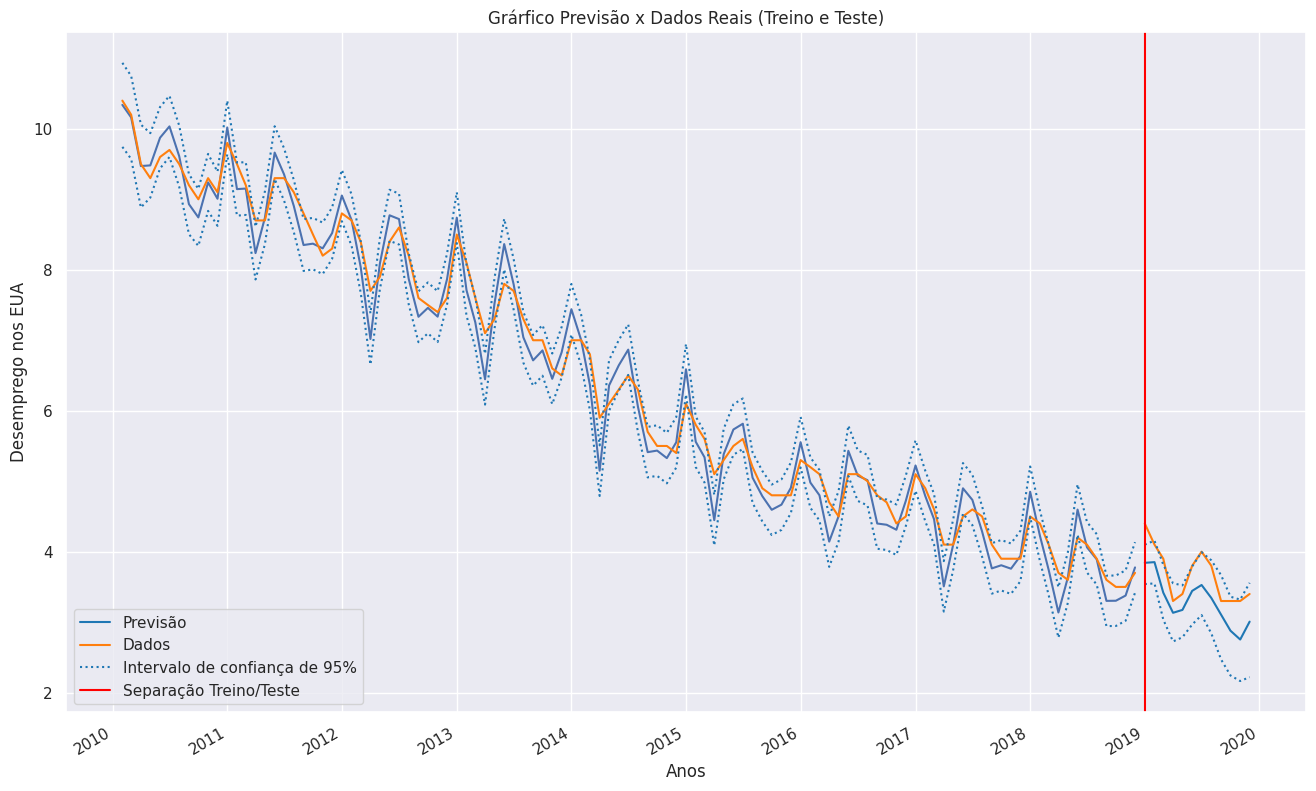

In [ ]:
upper_ci = simulated_with_error.quantile(q=0.95, axis='columns')
lower_ci = simulated_with_error.quantile(q=0.05, axis='columns')

plt.figure(figsize=(16,10))
plt.plot(mean, color="tab:blue",label="Previsão")
plt.plot(df_teste.unrate, color="tab:orange", label="Dados")
upper_ci.plot(linestyle=":", color="tab:blue", label="Intervalo de confiança de 95%")
lower_ci.plot(linestyle=":", color="tab:blue", label="_")
pred_summary["mean"].plot(label="_")
plt.plot(serie,label = "_", color="tab:orange")
pred_summary["mean_ci_lower"].plot(linestyle=":", color="tab:blue", label="_")
pred_summary["mean_ci_upper"].plot(linestyle=":", color="tab:blue", label="_")

plt.axvline(x="2019-01-01",color="red", label = "Separação Treino/Teste")
plt.legend()
plt.title("Grárfico Previsão x Dados Reais (Treino e Teste)")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

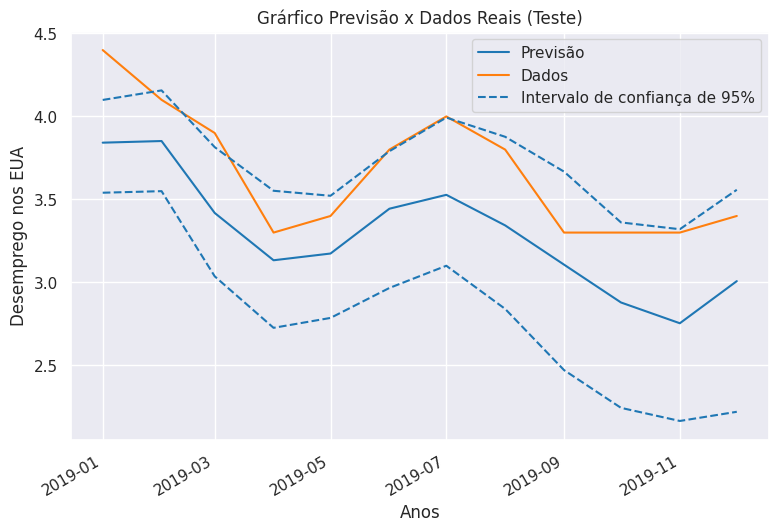

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(mean, color="tab:blue",label="Previsão")
plt.plot(df_teste.unrate, color="tab:orange", label="Dados")
upper_ci.plot(linestyle="--", color="tab:blue", label="Intervalo de confiança de 95%")
lower_ci.plot(linestyle="--", color="tab:blue", label="_")

plt.legend()
plt.title("Grárfico Previsão x Dados Reais (Teste)")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

Com a visualização gráfica das previsões fica fácil perceber que o modelo consistentemente subestimou a medida desejada, porem ainda se manteve razoavelmente próximo com a serie dos dados reais se mantendo dentro do intervalo de confiança de 95%.

## 2.IV

In [ ]:
df_treino_teste = df_original[-143:-23]
z = df_treino_teste.unrate.diff()
z = z.dropna()
z

date
2010-02-01   -0.2
2010-03-01   -0.2
2010-04-01   -0.7
2010-05-01   -0.2
2010-06-01    0.3
             ... 
2019-08-01   -0.2
2019-09-01   -0.5
2019-10-01    0.0
2019-11-01    0.0
2019-12-01    0.1
Name: unrate, Length: 119, dtype: float64

In [ ]:
model = sm.tsa.ARIMA(z, order=(5, 0, 4))

fit = model.fit()
clear_output()

In [ ]:
simulated_with_error = fit.simulate(anchor="end", nsimulations=24, repetitions=100)
simulated_with_error = simulated_with_error.cumsum()
simulated_with_error = simulated_with_error + df_treino_teste.unrate.iloc[-1]

In [ ]:
mean = simulated_with_error.quantile(q=0.5, axis='columns')
upper_ci = simulated_with_error.quantile(q=0.95, axis='columns')
lower_ci = simulated_with_error.quantile(q=0.05, axis='columns')

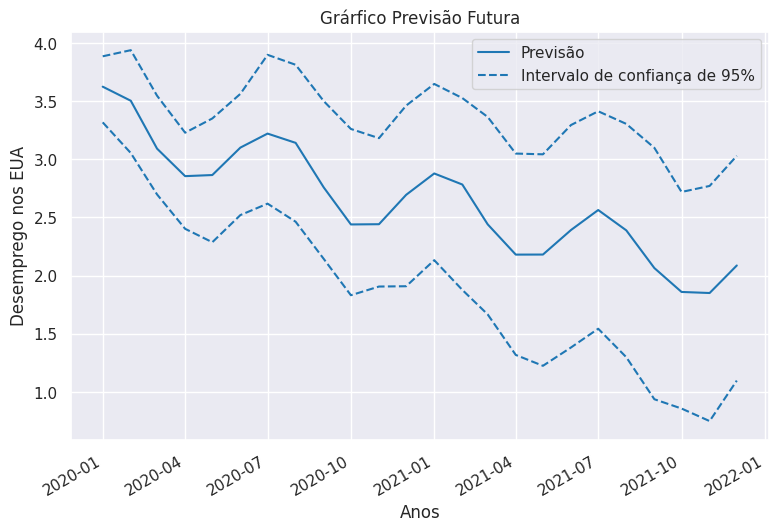

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(mean, color="tab:blue",label="Previsão")
upper_ci.plot(linestyle="--", color="tab:blue", label="Intervalo de confiança de 95%")
lower_ci.plot(linestyle="--", color="tab:blue", label="_")

plt.legend()
plt.title("Grárfico Previsão Futura")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

Observamos que o modelo preve uma queda no desemprego mantidas algumas flutuações anuais. Destacamos que o Intervalo de confiança cresce significativamente para horizontes de previsão maiores. Isso se deve ao acumulo das variaveis aleatórias presentes na formula do modelo, fato que apesar de preservar a média zero das distribuições normais, gera variações cada vez maiores.

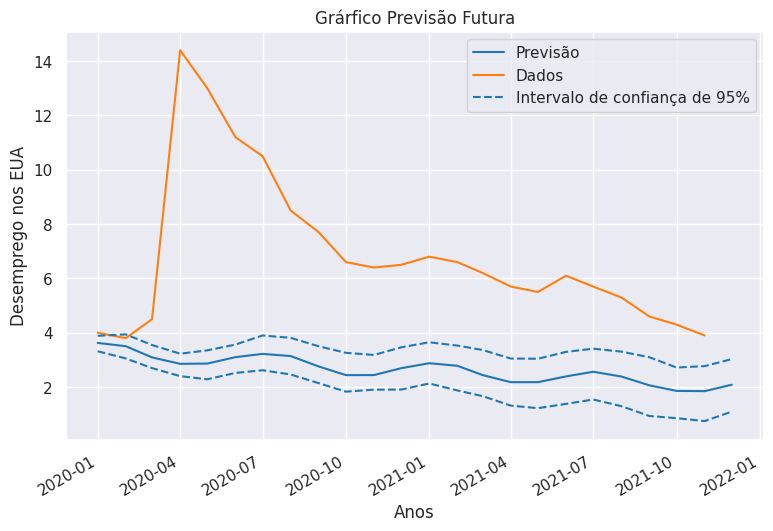

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(mean, color="tab:blue",label="Previsão")
plt.plot(df_original[-23:].unrate, color="tab:orange", label="Dados")
upper_ci.plot(linestyle="--", color="tab:blue", label="Intervalo de confiança de 95%")
lower_ci.plot(linestyle="--", color="tab:blue", label="_")

plt.legend()
plt.title("Grárfico Previsão Futura")
plt.xlabel("Anos")
plt.ylabel("Desemprego nos EUA")
plt.show()

Como ainda tinhamos dados disponiveis para maior parte deste horizonte de previsão, decidimos também plota-ló contra os dados reais do periodo. É possivel perceber que o modelo novamente subestimando o valor real, mas ainda mantendo-o dentro do intervalo de confiança. Porém, ocorre um grande pico após mar/2020 devido aos impactos da pandemia e mesmo com uma queda subsequente o desemprego continua mais elevado que o indicado pelo modelo.

In [ ]:
## Imprimir em PDF

from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/lista2.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/lista2.ipynb to pdf
[NbConvertApp] Support files will be in lista2_files/
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Making directory ./lista2_files
[NbConvertApp] Writing 76451 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Run